In [2]:
#basic operations
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

#trajectory smoothening
from scipy.interpolate import splprep, splev

#deep learning
import tensorflow as tf
import cvnn.layers as complex_layers


In [3]:
# Environment Parameters
epsilon = 1e-10
seed = 42


grid_min, grid_max = 0, 1
step_size = 0.1 # epsilon # distance after which angle changes.
total_time = 10
lookahead = 2
velocity = np.random.uniform(1, 5)
total_distance = velocity * total_time
num_steps = np.floor(total_distance / step_size)
rng = np.random.default_rng()

x_initial, y_initial = np.random.uniform(grid_min, grid_max, size=2)
head_dir_initial = math.radians(30)
#print(x_initial, y_initial)

tier_1 = np.arange(-30, 30, 1)
tier_2 = list(range(-60, -30)) + list(range(30, 60))
tier_3 = list(range(-90, -60)) + list(range(60, 90))
num_tries = 10


In [4]:
def get_future_pos(x_current, y_current, head_dir_current):
  x_future = x_current + lookahead * step_size * math.cos(head_dir_current)
  y_future = y_current + lookahead * step_size * math.sin(head_dir_current)
  return x_future, y_future

In [4]:
# Tiered search (random within tiers)

def choose_head_dir(x_current, y_current, head_dir_current):
  for _ in range(num_tries):
    head_dir_next = head_dir_current + math.radians(np.random.choice(tier_1))
    x_future, y_future = get_future_pos(x_current, y_current, head_dir_next)
    if grid_min < x_future < grid_max and grid_min < y_future < grid_max:
      #print("Turning slightly")
      return head_dir_next, x_future, y_future

  for _ in range(num_tries):  
    head_dir_next = head_dir_current + math.radians(np.random.choice(tier_2))    
    x_future, y_future = get_future_pos(x_current, y_current, head_dir_next)
    if grid_min < x_future < grid_max and grid_min < y_future < grid_max:
      #print("Turning diagonally")
      return head_dir_next, x_future, y_future
  
  for _ in range(num_tries):
    head_dir_next = head_dir_current + math.radians(np.random.choice(tier_3))
    x_future, y_future = get_future_pos(x_current, y_current, head_dir_next)
    if grid_min <= x_future <= grid_max and grid_min < y_future < grid_max:
      #print("Turning almost orthagonally")
      return head_dir_next, x_future, y_future
    
  head_dir_next = head_dir_current + math.radians(180)
  x_future, y_future = get_future_pos(x_current, y_current, head_dir_next)
  #print("Taking a U-turn")
  return head_dir_next, x_future, y_future

In [5]:
# Trajectory generation

def generate_trajectory(velocity):
    X = []
    Y = []
    HD = []
    x_initial, y_initial = np.random.uniform(grid_min, grid_max, size=2)
    initial_positions = (x_initial, y_initial)
    head_dir_initial = math.radians(0)
    distance = velocity * total_time
    num_steps = np.floor(distance / step_size)

    for i in range(int(num_steps)):
        if i == 0:
            head_dir_current = head_dir_initial
            x_current, y_current = x_initial, y_initial
            X.append(x_current)
            Y.append(y_current)
            HD.append(head_dir_current)
        
        head_dir_next, x_lookahead, y_lookahead = choose_head_dir(x_current, y_current, head_dir_current)
        x_next = x_current + step_size * math.cos(head_dir_next)
        y_next = y_current + step_size * math.sin(head_dir_next)
        X.append(x_next)
        Y.append(y_next)
        HD.append(head_dir_next)

        head_dir_current = head_dir_next
        x_current, y_current = x_next, y_next

    X = np.array(X)
    Y = np.array(Y)
    HD = np.array(HD)
    initial_positions = np.array(initial_positions)
    #print(X.shape, Y.shape, HD.shape, initial_positions.shape)    
    return initial_positions, X, Y    


In [6]:
# Generating Sharp Turns
'''
total_time_steps = int(total_time / 0.01)

def generate_sharp_trajectory(velocity):
    X = []
    Y = []
    HD = []

    x_current, y_current = np.random.uniform(grid_min, grid_max, size=2)
    head_dir_current = math.radians(0)

    X.append(x_current)
    Y.append(y_current)
    HD.append(head_dir_current)


    # Loop exactly 1000 times
    for i in range(1, total_time_steps):  # assume total_time_steps = 1000
        # Change direction every 50 steps
        
            
        if i % 50 == 0:
            head_dir_current, x_lookahead, y_lookahead = choose_head_dir(
                x_current, y_current, head_dir_current
            )
            
        

        # Move one step
        x_next = x_current + step_size * math.cos(head_dir_current)
        y_next = y_current + step_size * math.sin(head_dir_current)

        # Store
        X.append(x_next)
        Y.append(y_next)
        HD.append(head_dir_current)

        # Update position
        x_current, y_current = x_next, y_next
        

    # Convert to arrays
    X = np.array(X)
    Y = np.array(Y)
    HD = np.array(HD)

    print(X.shape, Y.shape, HD.shape)  # should all be (1000,)
    return X, Y

x_temp, y_temp = generate_sharp_trajectory(0.5)
plt.plot(x_temp, y_temp)

'''

'\ntotal_time_steps = int(total_time / 0.01)\n\ndef generate_sharp_trajectory(velocity):\n    X = []\n    Y = []\n    HD = []\n\n    x_current, y_current = np.random.uniform(grid_min, grid_max, size=2)\n    head_dir_current = math.radians(0)\n\n    X.append(x_current)\n    Y.append(y_current)\n    HD.append(head_dir_current)\n\n\n    # Loop exactly 1000 times\n    for i in range(1, total_time_steps):  # assume total_time_steps = 1000\n        # Change direction every 50 steps\n        \n            \n        if i % 50 == 0:\n            head_dir_current, x_lookahead, y_lookahead = choose_head_dir(\n                x_current, y_current, head_dir_current\n            )\n            \n        \n\n        # Move one step\n        x_next = x_current + step_size * math.cos(head_dir_current)\n        y_next = y_current + step_size * math.sin(head_dir_current)\n\n        # Store\n        X.append(x_next)\n        Y.append(y_next)\n        HD.append(head_dir_current)\n\n        # Update positio

In [7]:
# Using Spline function
def generate_smooth_trajectory(velocity):

    initial_positions, X_sharp, Y_sharp = generate_trajectory(velocity)
    # s = smoothing factor, larger = smoother
    tck, u = splprep([X_sharp, Y_sharp], s=0)
    u_new = np.linspace(0, 1, 1000)  # denser sampling
    x_smooth, y_smooth = splev(u_new, tck)
    return initial_positions, x_smooth, y_smooth

In [8]:
# Limb oscillations with curvature

#Parameters

dt = 0.01 # time step
time_series = np.arange(0, total_time, dt)
total_time_steps = len(time_series)

am = 0.1 # stride length
L = 0.05 # length of limb
phi = math.pi #phase difference between contralateral limbs
d = 0.05 # spacing between limb pairs

theta_m = am / (4 * L) # max angle of limb movement
limb_osc_freq = rng.uniform(1, 5) # frequency of limb oscillation
omega = 2 * math.pi * limb_osc_freq # angular frequency

def curvature(x, y):
    dx = np.gradient(x)
    dy = np.gradient(y)
    ddx = np.gradient(dx)
    ddy = np.gradient(dy)
    return (dx * ddy - dy * ddx) / ((dx**2 + dy**2)**1.5 + 1e-8)
    # To avoid division by zero

def limb_oscillations_with_curvature(t, am, L, omega, phi, d, x, y):
    theta_m = am / (4 * L)
    k = curvature(x, y)

    UFL = theta_m * (1 + k*d) * np.sin(omega*t)
    UFR = theta_m * (1 - k*d) * np.sin(omega*t + phi)
    UHR = theta_m * (1 - k*d) * np.sin(omega*t)
    UHL = theta_m * (1 + k*d) * np.sin(omega*t + phi)

    return UFL, UFR, UHR, UHL, k

In [9]:
# Generate 100 trajectories and corresponding limb oscillations

def generate_data(num_trajectories):
    X_all, Y_all = [], []
    limb_data_all = []
    initial_positions_all = []

    for trajectory in range(num_trajectories):
        limb_osc_freq = np.random.uniform(1, 5)
        velocity = am * limb_osc_freq
        omega = 2 * math.pi * limb_osc_freq
        
        initial_positions, X, Y = generate_smooth_trajectory(velocity)
        initial_positions_all.append(initial_positions)
        X_all.append(X)
        Y_all.append(Y)

        limb_data = limb_oscillations_with_curvature(time_series, am, L, omega, phi, d, X, Y)
        limb_data_all.append(limb_data)


    return initial_positions_all, X_all, Y_all, limb_data_all
    print("Generated", num_trajectories, "trajectories with corresponding limb oscillations.")

initial_positions_all, X_all, Y_all, limb_data_all = generate_data(100)


In [10]:
X_all = np.array(X_all)
Y_all = np.array(Y_all)
initial_positions_all = np.array(initial_positions_all)
limb_data_all = np.array(limb_data_all)

print(initial_positions_all.shape, X_all.shape, Y_all.shape, limb_data_all.shape)

(100, 2) (100, 1000) (100, 1000) (100, 5, 1000)


In [11]:
traj_data = np.stack((X_all, Y_all), axis=-1)
print(traj_data.shape) # (100, 1000, 2)

gait_data = limb_data_all.transpose(0, 2, 1)  # (num_trajectories, time_steps, 4 limbs + curvature)
print(gait_data.shape) # (100, 1000, 5)
gait_data_without_curvature = gait_data[:, :, :4]
print(gait_data_without_curvature.shape) #(100, 1000, 4)

initial_positions_all_expanded = np.repeat(initial_positions_all[:, :, np.newaxis], 1000, axis=2)
print(initial_positions_all_expanded.shape)  # (100, 2, 1000)
initial_positions_transpose = initial_positions_all_expanded.transpose(0, 2, 1)
print(initial_positions_transpose.shape)  # (100, 1000, 2)

gait_data_with_initial_pos = np.concatenate((initial_positions_transpose, gait_data_without_curvature), axis=2)
print(gait_data_with_initial_pos.shape) # (100, 1000, 6)

(100, 1000, 2)
(100, 1000, 5)
(100, 1000, 4)
(100, 2, 1000)
(100, 1000, 2)
(100, 1000, 6)


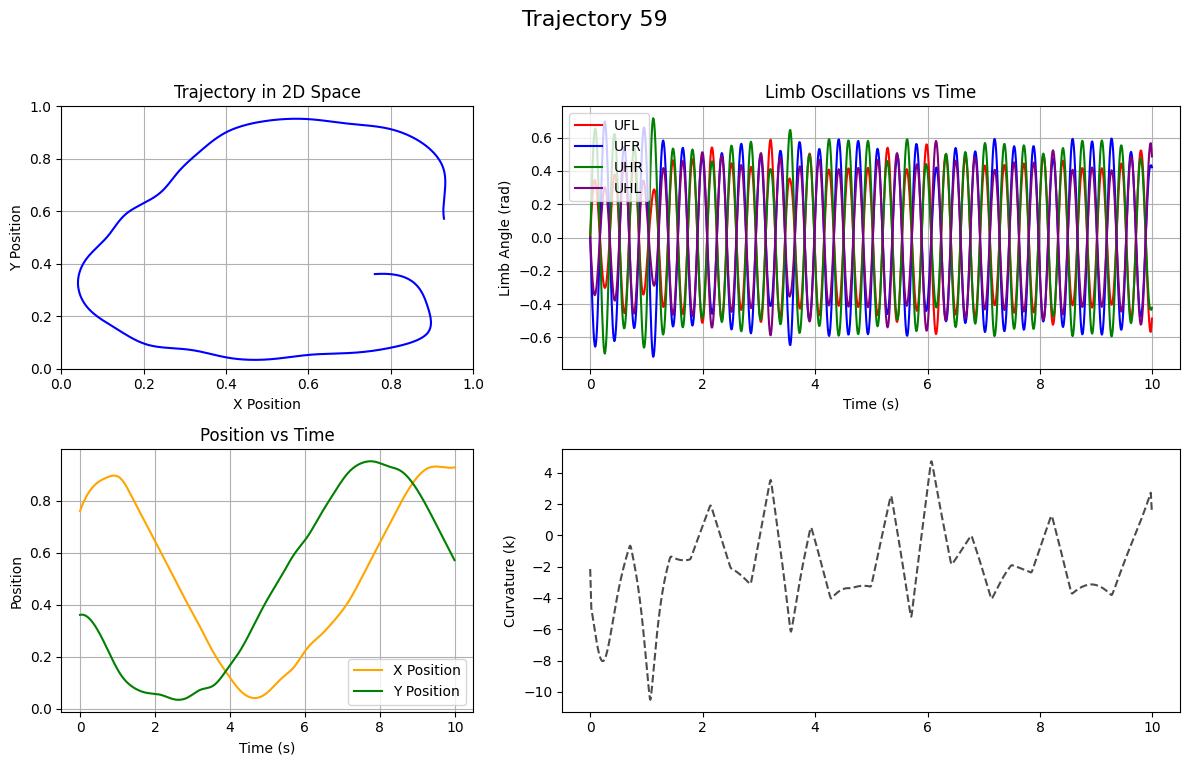

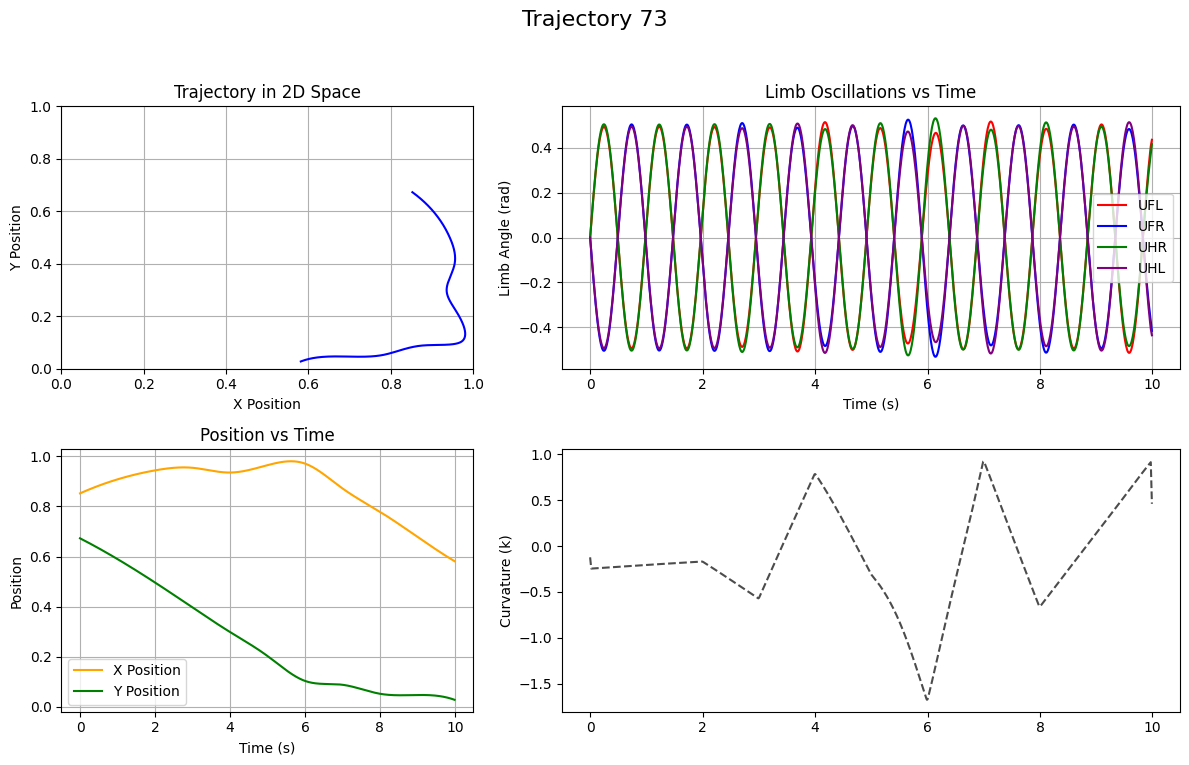

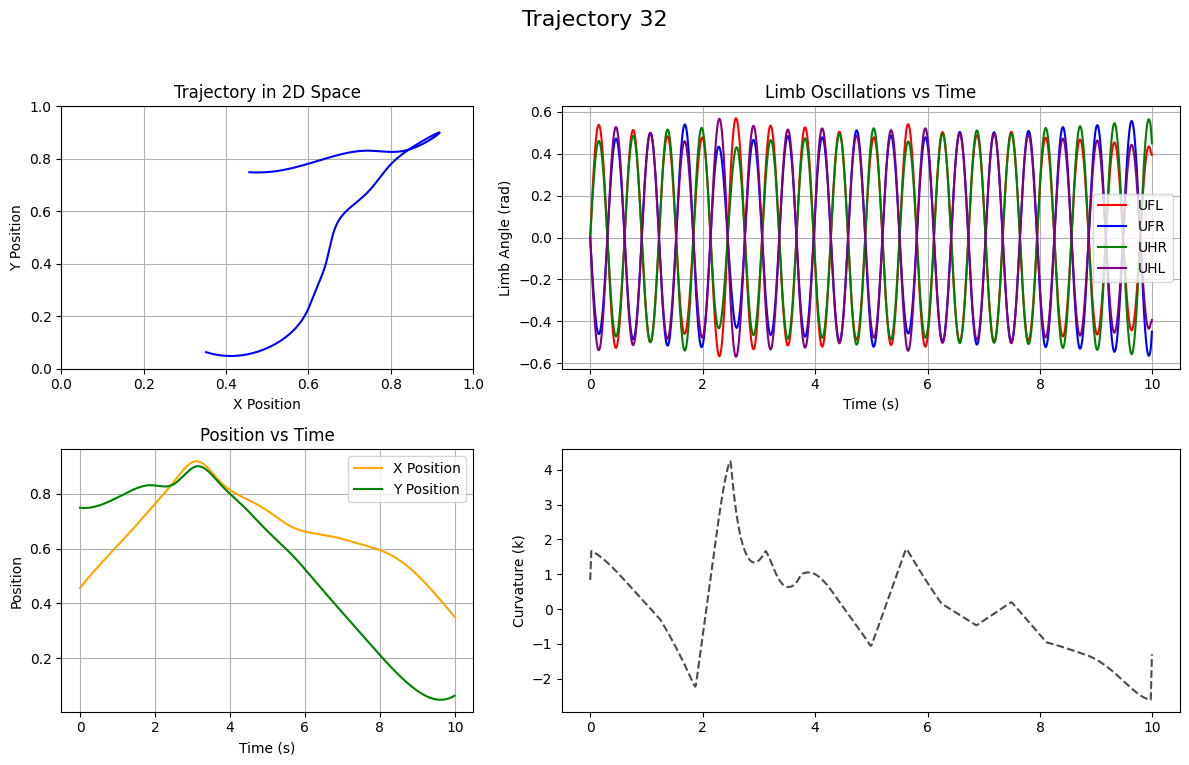

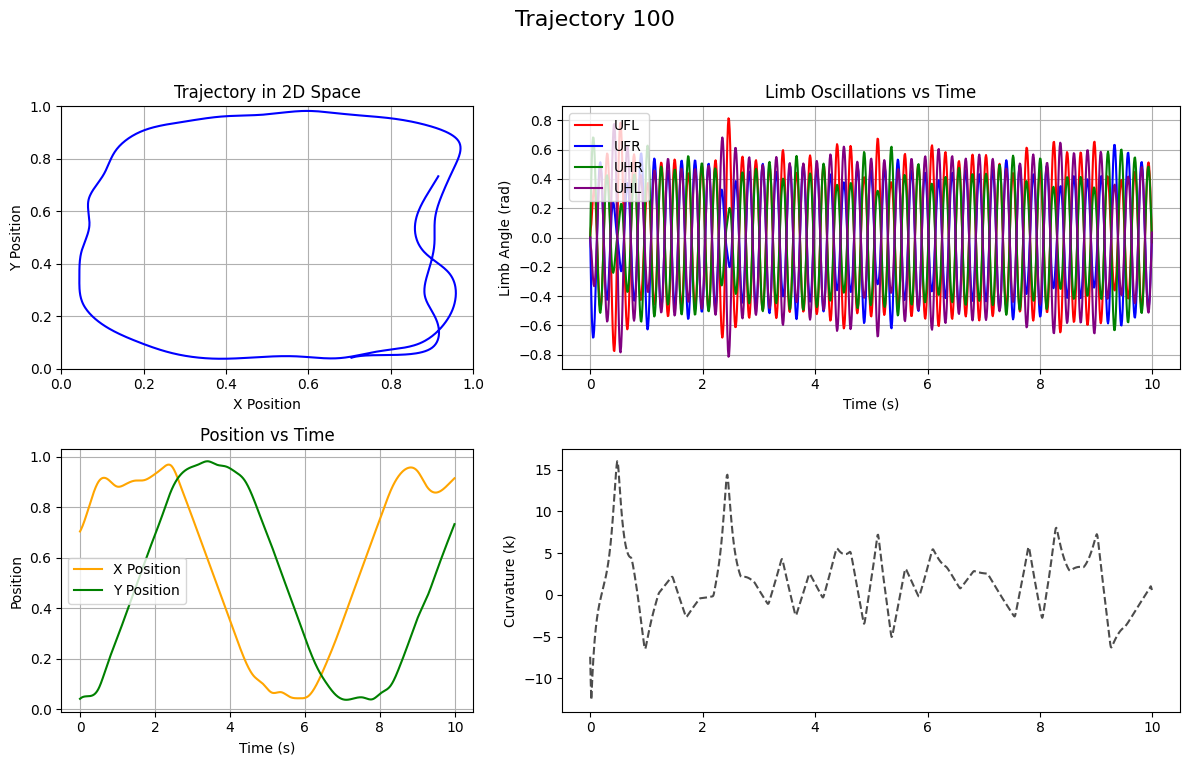

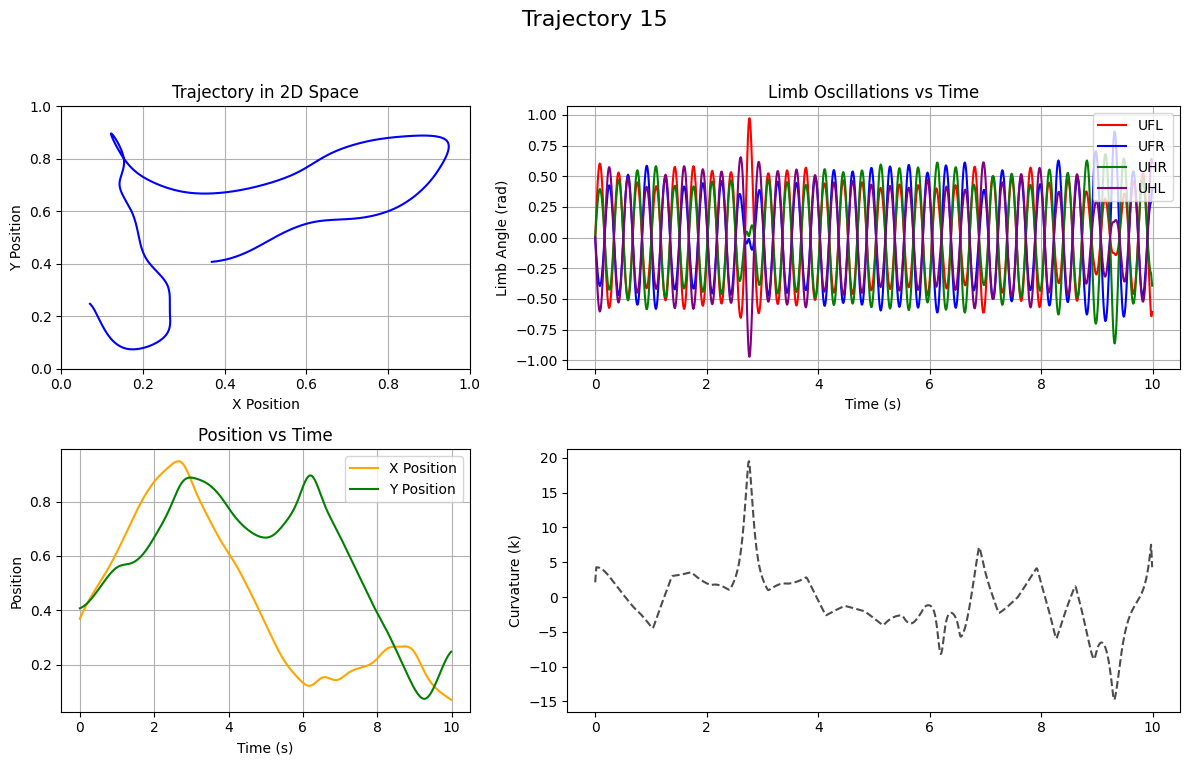

In [12]:
# Plotting trajectory, position vs time and limb oscillations for five random trajectories
for i in range(5):
    traj_index = np.random.randint(0, 100)
    X_traj = X_all[traj_index]
    Y_traj = Y_all[traj_index]
    limb_data_traj = limb_data_all[traj_index]
    UFL, UFR, UHR, UHL, k = limb_data_traj

    # Time vector
    t = time_series[:len(X_traj)]

    # Create a 2x2 grid
    fig, axes = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw={'width_ratios': [1, 1.5]})
    fig.suptitle(f"Trajectory {traj_index+1}", fontsize=16)

    # --- Top-left: Trajectory in grid ---
    axes[0, 0].plot(X_traj, Y_traj, color='blue')
    axes[0, 0].set_title('Trajectory in 2D Space')
    axes[0, 0].set_xlabel('X Position')
    axes[0, 0].set_ylabel('Y Position')
    axes[0, 0].set_xlim(0, 1)
    axes[0, 0].set_ylim(0, 1)
    axes[0, 0].grid()

    # --- Bottom-left: Position vs time ---
    axes[1, 0].plot(t, X_traj, label='X Position', color='orange')
    axes[1, 0].plot(t, Y_traj, label='Y Position', color='green')
    axes[1, 0].set_title('Position vs Time')
    axes[1, 0].set_xlabel('Time (s)')
    axes[1, 0].set_ylabel('Position')
    axes[1, 0].legend()
    axes[1, 0].grid()

    # --- Right column (span): Limb oscillations ---
    ax_right = axes[0, 1]
    #axes[1, 1].remove()  # merge bottom cell with top
    ax_right.plot(t, UFL[:len(t)], label='UFL', color='red')
    ax_right.plot(t, UFR[:len(t)], label='UFR', color='blue')
    ax_right.plot(t, UHR[:len(t)], label='UHR', color='green')
    ax_right.plot(t, UHL[:len(t)], label='UHL', color='purple')
    ax_right.set_title('Limb Oscillations vs Time')
    ax_right.set_xlabel('Time (s)')
    ax_right.set_ylabel('Limb Angle (rad)')
    ax_right.legend()
    ax_right.grid()

    #Plotting k values
    ax_bottom_right = axes[1, 1]
    
    ax_bottom_right.plot(t, k[:len(t)], label='Curvature (k)', color='black', linestyle='--', alpha=0.7)
    ax_bottom_right.set_ylabel('Curvature (k)')
    #ax_k.legend(loc='upper right')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


In [13]:
# Hopf Oscillator 

@tf.function
def real_cal(r, phi):
    return r * tf.math.cos(phi)

@tf.function
def imag_cal(r, phi):
    return r * tf.math.sin(phi)

@tf.function
#X_r and X_i are input signals, omegas are angular frequencies, num_steps = number of steps
def oscillator_loop(X_r, X_i, omegas, num_steps):
    #r_arr and phi_arr store the evolving values of r (magnitude) and phi (phase angle)
    r_arr = tf.TensorArray(dtype=tf.float32, size=0, dynamic_size=True)
    phi_arr = tf.TensorArray(dtype=tf.float32, size=0, dynamic_size=True)
    #Initialising r and phi
    r_t = tf.ones((tf.shape(X_r)[0], tf.shape(X_r)[-1]))
    phis = tf.zeros((tf.shape(X_r)[0], tf.shape(X_r)[-1]))
    #phis = tf.random.uniform((tf.shape(X_r)[0], tf.shape(X_r)[-1]), minval=-5.0, maxval=5.0)
    dt = 0.01
    input_scaler = 10

    for t in tf.range(num_steps):
        input_r = input_scaler*X_r[:,t,:]*tf.math.cos(phis)
        input_phi = input_scaler*X_i[:,t,:]*tf.math.sin(phis)
        r_t = r_t + ((1 - 1*tf.square(r_t)) * r_t + input_r) * dt
        phis = phis + (omegas - input_phi) * dt
        r_arr = r_arr.write(r_arr.size(), r_t)
        phi_arr = phi_arr.write(phi_arr.size(), phis)
    r_arr = tf.transpose(r_arr.stack(), [1, 0, 2])
    phi_arr = tf.transpose(phi_arr.stack(), [1, 0, 2])
    return r_arr, phi_arr

class Hopf(tf.keras.layers.Layer):

    def __init__(self, units, num_steps, min_f=0.1,
                 max_f=10.1, **kwargs):
        super(Hopf, self).__init__(**kwargs)
        self.units = units
        self.num_steps = num_steps
        self.omegas = tf.linspace(min_f, max_f, self.units) * (2*math.pi)
        #Min and max angular freqs. of the oscillators
        self.omegas = tf.cast(tf.expand_dims(self.omegas, 0), 'float32')

    def call(self, z_complex):
        X_r = tf.math.real(z_complex)
        X_i = tf.math.imag(z_complex)
        r, phi = oscillator_loop(X_r, X_i, self.omegas, self.num_steps)
        z_real = real_cal(r, phi)
        z_imag = imag_cal(r, phi)
        return tf.complex(z_real, z_imag)

In [14]:
# Complex DONN

class Model(tf.keras.Model):

    def __init__(self, units, duration, **kwargs):

        super(Model, self).__init__(**kwargs)

        #Input Layer
        self.d1 = complex_layers.ComplexDense(units, activation='cart_relu')
        
        #Hidden Layer
        self.osc1 = Hopf(units, num_steps=duration, min_f=1, max_f=5)
        self.d2 = complex_layers.ComplexDense(units, activation='cart_relu')
        self.osc2 = Hopf(units, num_steps=duration, min_f=4, max_f=8)
        self.d3 = complex_layers.ComplexDense(units, activation='cart_relu')
        self.osc3 = Hopf(units, num_steps=duration, min_f=8, max_f=10)
        self.dense1 = complex_layers.ComplexDense(units, activation='cart_sigmoid')
        

        #Output layer
        self.out_dense = tf.keras.layers.Dense(2)
        
        #Store intermediate layer outputs
        #self.layer_outputs = {}
    
    def build(self, input_shape):
        self.built = True

    def call(self, X):

        X_c = tf.complex(X, tf.zeros_like(X))

        d1 = self.d1(X_c) 
        self.d1_out = d1
        z1 = self.osc1(d1)     
        self.z1_out = z1
        d2 = self.d2(z1)
        self.d2_out = d2
        z2 = self.osc2(d2)
        self.z2_out = z2
        d3 = self.d3(z2)
        self.d3_out = d3
        z3 = self.osc3(d3)
        self.z3_out = z3
        dense1 = self.dense1(z3)
        self.dense1_out = dense1
        
        dense1_mag = tf.math.abs(dense1) 
        

        out_final = self.out_dense(tf.math.abs(dense1_mag))
        self.out_final = out_final

        return out_final

In [15]:
X = gait_data_with_initial_pos
Y = traj_data

In [16]:
print(X.shape, Y.shape)

(100, 1000, 6) (100, 1000, 2)


In [19]:
model = Model(units = 100,duration= total_time_steps)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='mse',run_eagerly=True)

num_features = X.shape[-1]  # Ensure this matches the input features
dummy_input = tf.zeros((50, total_time_steps, num_features))  # Batch size = 100 (example)
_ = model(dummy_input)

In [25]:
model.fit(X[:, :total_time_steps, :],Y[:, :total_time_steps, :], epochs=200, batch_size=20, validation_split=0.2, callbacks=[])

Epoch 1/200
4/4 [==============================] - 8s 2s/step - loss: 0.0073 - val_loss: 0.0751
Epoch 2/200
4/4 [==============================] - 8s 2s/step - loss: 0.0073 - val_loss: 0.0748
Epoch 3/200
4/4 [==============================] - 8s 2s/step - loss: 0.0072 - val_loss: 0.0756
Epoch 4/200
4/4 [==============================] - 8s 2s/step - loss: 0.0072 - val_loss: 0.0754
Epoch 5/200
4/4 [==============================] - 8s 2s/step - loss: 0.0072 - val_loss: 0.0753
Epoch 6/200
4/4 [==============================] - 8s 2s/step - loss: 0.0072 - val_loss: 0.0750
Epoch 7/200
4/4 [==============================] - 8s 2s/step - loss: 0.0072 - val_loss: 0.0748
Epoch 8/200
4/4 [==============================] - 8s 2s/step - loss: 0.0072 - val_loss: 0.0762
Epoch 9/200
4/4 [==============================] - 8s 2s/step - loss: 0.0073 - val_loss: 0.0753
Epoch 10/200
4/4 [==============================] - 9s 2s/step - loss: 0.0074 - val_loss: 0.0758
Epoch 11/200
4/4 [=====================

In [26]:
model.save_weights('saved_weights/2d_weights_mse_500epochs.h5')

In [27]:
model.load_weights('saved_weights/2d_weights_mse_500epochs.h5')
predictions = model.predict(X[:, :, :])
print(predictions.shape)

4/4 [==============================] - 1s 155ms/step
(100, 1000, 2)


In [28]:
predictions[:, :, 0].shape

(100, 1000)

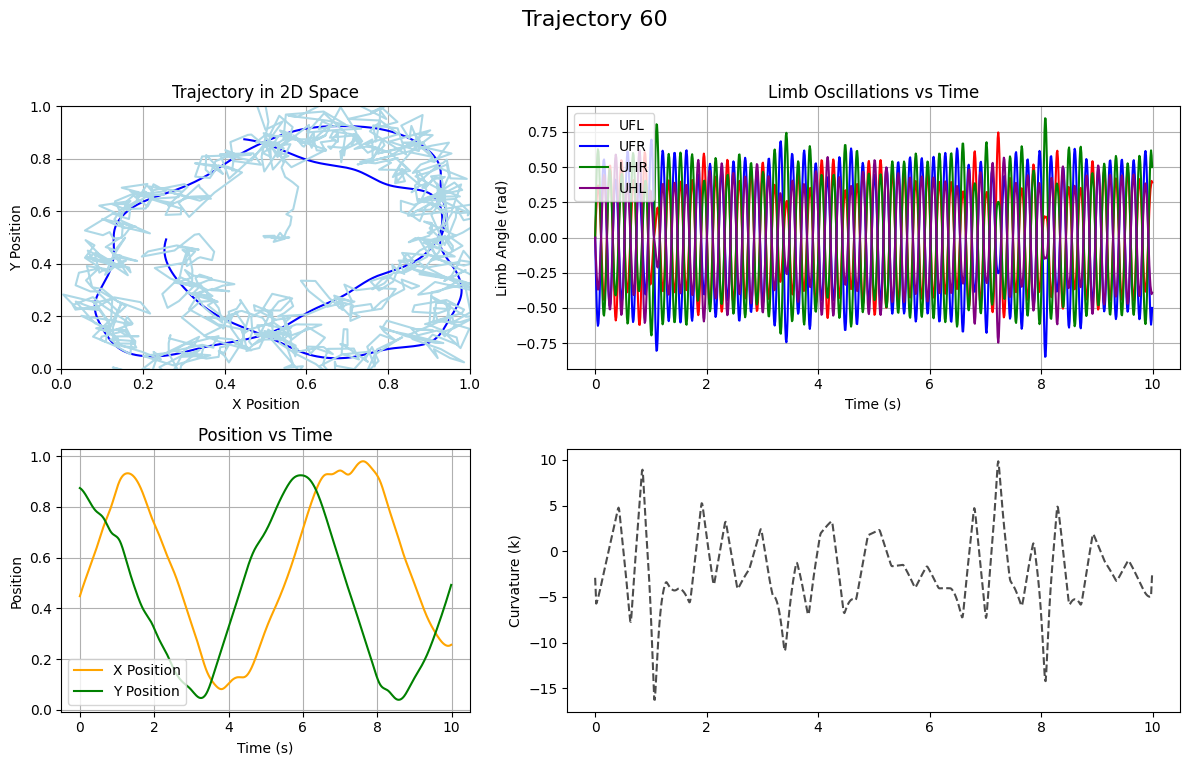

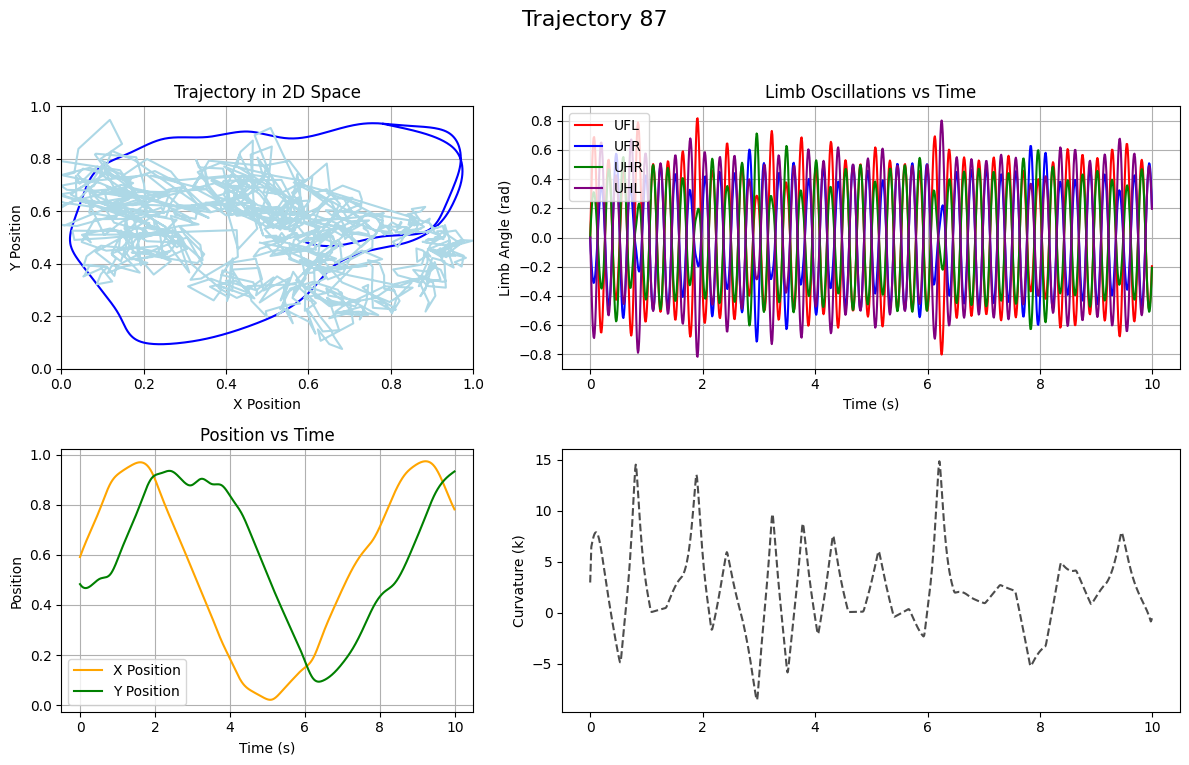

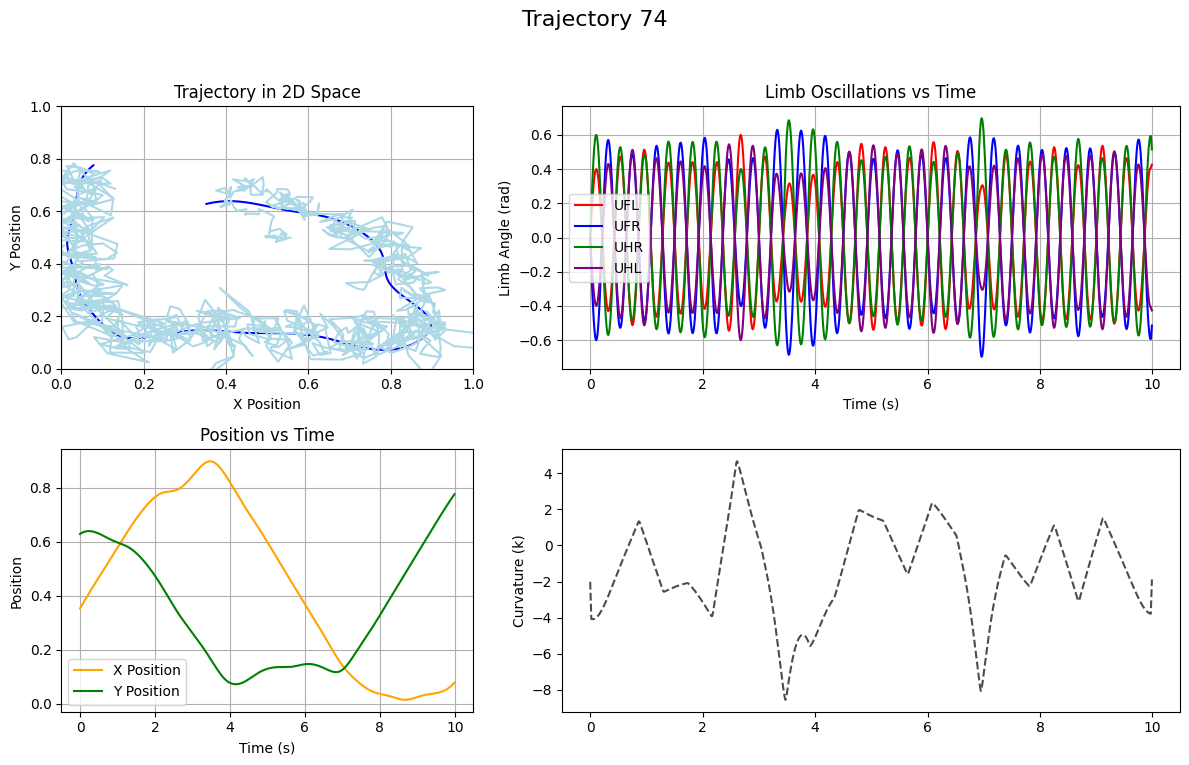

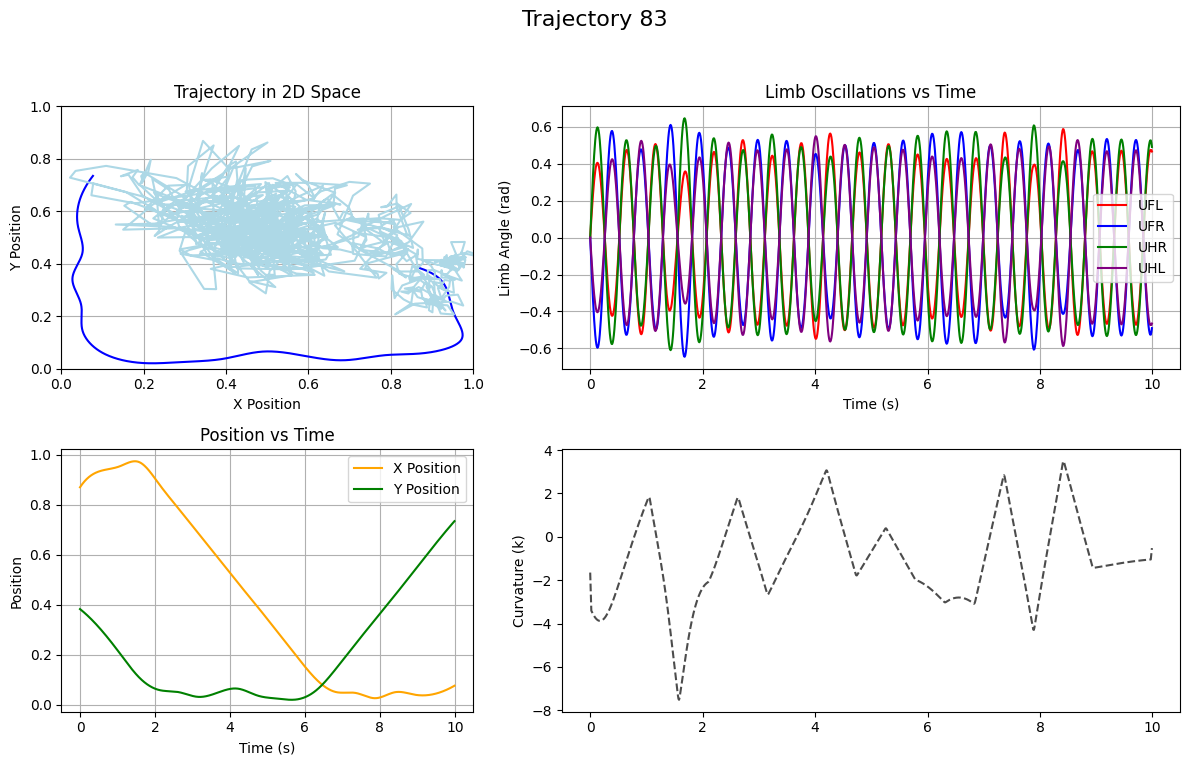

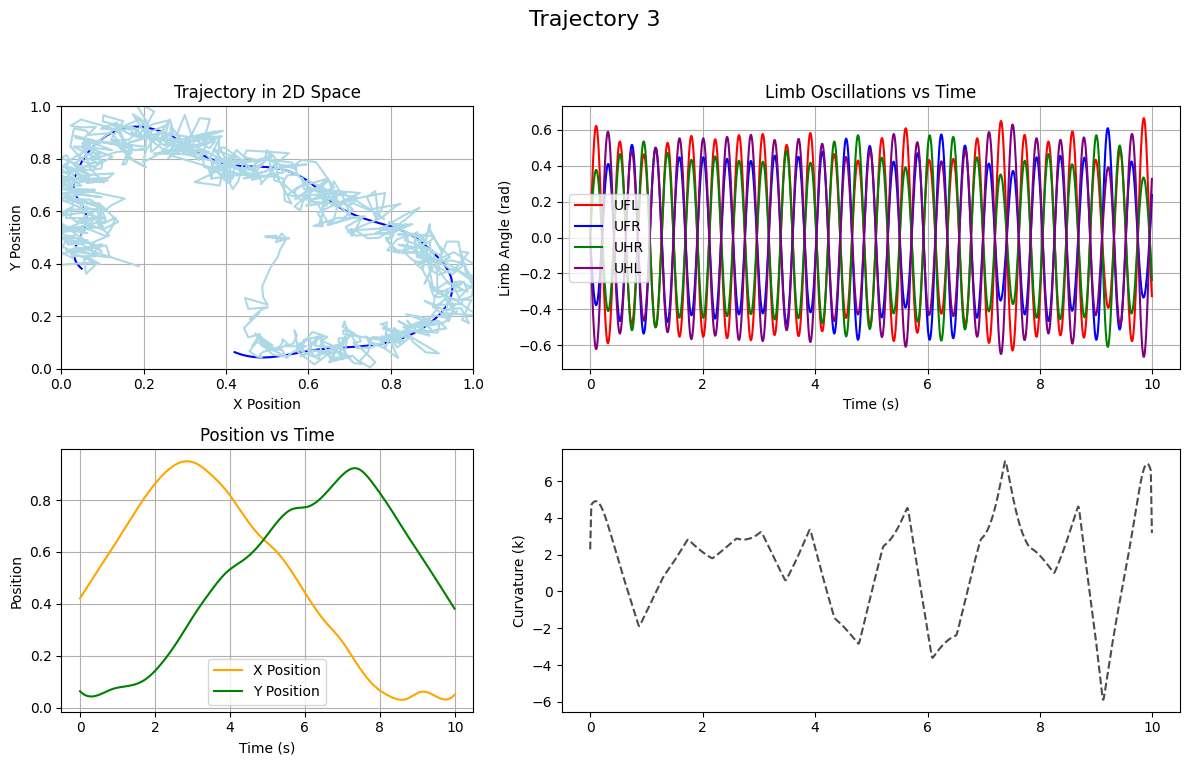

In [29]:
# Plotting trajectory, position vs time and limb oscillations for five random trajectories
for i in range(5):
    traj_index = np.random.randint(0, 100)
    X_traj = X_all[traj_index]
    Y_traj = Y_all[traj_index]
    limb_data_traj = limb_data_all[traj_index]
    UFL, UFR, UHR, UHL, k = limb_data_traj

    # Time vector
    t = time_series[:len(X_traj)]

    # Create a 2x2 grid
    fig, axes = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw={'width_ratios': [1, 1.5]})
    fig.suptitle(f"Trajectory {traj_index+1}", fontsize=16)

    # --- Top-left: Trajectory in grid ---
    axes[0, 0].plot(X_traj, Y_traj, color='blue')
    axes[0, 0].plot(predictions[traj_index, :, 0], predictions[traj_index, :, 1], color='lightblue')
    axes[0, 0].set_title('Trajectory in 2D Space')
    axes[0, 0].set_xlabel('X Position')
    axes[0, 0].set_ylabel('Y Position')
    axes[0, 0].set_xlim(0, 1)
    axes[0, 0].set_ylim(0, 1)
    axes[0, 0].grid()

    # --- Bottom-left: Position vs time ---
    axes[1, 0].plot(t, X_traj, label='X Position', color='orange')
    axes[1, 0].plot(t, Y_traj, label='Y Position', color='green')
    axes[1, 0].set_title('Position vs Time')
    axes[1, 0].set_xlabel('Time (s)')
    axes[1, 0].set_ylabel('Position')
    axes[1, 0].legend()
    axes[1, 0].grid()

    # --- Right column (span): Limb oscillations ---
    ax_right = axes[0, 1]
    #axes[1, 1].remove()  # merge bottom cell with top
    ax_right.plot(t, UFL[:len(t)], label='UFL', color='red')
    ax_right.plot(t, UFR[:len(t)], label='UFR', color='blue')
    ax_right.plot(t, UHR[:len(t)], label='UHR', color='green')
    ax_right.plot(t, UHL[:len(t)], label='UHL', color='purple')
    ax_right.set_title('Limb Oscillations vs Time')
    ax_right.set_xlabel('Time (s)')
    ax_right.set_ylabel('Limb Angle (rad)')
    ax_right.legend()
    ax_right.grid()

    #Plotting k values
    ax_bottom_right = axes[1, 1]
    
    ax_bottom_right.plot(t, k[:len(t)], label='Curvature (k)', color='black', linestyle='--', alpha=0.7)
    ax_bottom_right.set_ylabel('Curvature (k)')
    #ax_k.legend(loc='upper right')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
